# Introduction

For more context see http://wrobell.it-zone.org/decotengu/model.html.

To evaluate the equations we use Sympy library

In [2]:
from sympy import init_session

In [3]:
init_session(quiet=True)

IPython console for SymPy 0.7.6 (Python 3.4.3-64-bit) (ground types: gmpy)


# Schreiner Equation

In [4]:
P, P_alv, R, t, k, P_i, F_gas, P_abs, P_rate, P_wvp = symbols('P P_alv R t k P_i F_gas P_abs P_rate P_wvp')

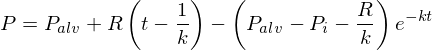

In [5]:
s_eq = Eq(P, P_alv + R * (t - 1 / k) - (P_alv - P_i - R / k) * exp(-k * t))
s_eq

## Example

Descent from 0m to 30m at 20m/min breathing EAN32

In [6]:
v = s_eq.subs([
    (P_alv, F_gas * (P_abs - P_wvp)),
    (P_i, 0.7902 * (P_abs - P_wvp)),
    (R, F_gas * P_rate),
    (k, log(2) / 5),
    (t, 1.5),
    (P_wvp, 0.0627),
    (P_abs, 1),
    (P_rate, 2),    # 20m/min
    (F_gas, 0.68)
])
N(v)

 Dive at 30m for 20 minutes

In [7]:
v = s_eq.subs([
    (P_alv, F_gas * (P_abs - P_wvp)),
    (P_i, 0.919396673989346),
    (R, F_gas * P_rate),
    (k, log(2) / 5),
    (t, 20),
    (P_wvp, 0.0627),
    (P_abs, 4),
    (P_rate, 0),
    (F_gas, 0.68)
])
N(v)

Ascent from 30m to 10m

In [8]:
v = s_eq.subs([
    (P_alv, F_gas * (P_abs - P_wvp)),
    (P_i, 2.56749104212433),
    (R, F_gas * P_rate),
    (k, log(2) / 5),
    (t, 2),
    (P_wvp, 0.0627),
    (P_rate, -1),     # ascent, 10m/min
    (P_abs, 4),
    (F_gas, 0.68)
])
N(v)

# Buhlmann Equation

In [9]:
P_l, A, B, g_f = symbols('P_l A B g_f')

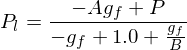

In [10]:
b_eq = Eq(P_l, (P - A * g_f) / (g_f / B + 1.0 - g_f))
b_eq

## Example

For first tissue compartment

In [11]:
b_eq_t1 = b_eq.subs([(A, 1.1696), (B, 0.5578), (g_f, 0.3)])

In [12]:
N(b_eq_t1.subs(P, 0.74065446))

In [13]:
N(b_eq_t1.subs(P, 0.919397))

In [14]:
N(b_eq_t1.subs(P, 2.567490))

In [15]:
N(b_eq_t1.subs(P, 2.421840))